<a href="https://colab.research.google.com/github/aline-fortaleza/mini_decision_tree/blob/main/Mini_arvores_de_decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grupo:
- Alice Buarque (abc3)
- Aline Fortaleza (affs2)
- Arthur Marsaro (aam4)
- Beatriz Leão (bgcl)
- Danilo Carvalho (dlc3)

Importações


In [ ]:
# Importando bibliotecas para manipulação e análise de dados
import pandas as pd
import numpy as np

# Importando bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o modelo de Árvore de Decisão do Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Importando ferramentas para avaliação do modelo
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configurações para melhor visualização dos gráficos
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-deep')

from imblearn.over_sampling import SMOTE

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


Carregamento do dataset

In [ ]:
 # Fazendo o upload do arquivo train.csv para o ambiente do Colab
from google.colab import files
uploaded = files.upload()

# Carregando o dataset em um DataFrame do Pandas
try:
    df_gender = pd.read_csv('gender_submission.csv')
    df_train = pd.read_csv('train.csv')
    df_test = pd.read_csv('test.csv')
    print("Dataset carregado com sucesso!")
except FileNotFoundError:
    print("Erro: Arquivos não encontrados. Verifique o nome do arquivo enviado.")

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv
Dataset carregado com sucesso!


# Dataset utilizado

O banco de dados **"Titanic - Machine Learning from Disaster"** é voltado para competições de *Machine Learning*. Nesse dataset, são fornecidas informações como classe do ticket do passageiro, sexo, idade, porto de embarque, entre outras. O objetivo é utilizar essas informações para prever a variável `Survived`, que é um valor booleano indicando se o passageiro sobreviveu ou não ao naufrágio.

O dataset é composto por dois arquivos: `train.csv` e `test.csv`. O `train.csv` contém, além das informações gerais sobre os passageiros, a informação sobre se eles sobreviveram ou não. Já o `test.csv` não inclui essa informação.


In [ ]:
training = df_train
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
training.shape

(891, 12)

#Representação Gráfica e Análise Descritiva

Nessa etapa vamos criar alguns gráficos de visualizações que permitam o conhecimento do comportamento de algumas variáveis. Isso é importante para analisar os dados e relevar comportamentos inesperados (Como dados faltantes ou inconsistentes).

##Formato do Dataset
O dataset tem 891 linhas (cada linha sendo um passageiro) e 12 colunas, cada uma descrevendo uma das variáveis abaixo:

- **`survival`**: Indica se o passageiro sobreviveu (`1`) ou não (`0`). É a variável-alvo (target) da nossa classificação.

- **`pclass`**: Representa a classe do bilhete do passageiro, onde `1` é a 1ª classe (mais alta), `2` é a 2ª classe e `3` é a 3ª classe (mais baixa). Essa variável pode estar associada ao status socioeconômico do passageiro.

- **`sex`**: Sexo do passageiro, com valores `male` (masculino) ou `female` (feminino).

- **`age`**: Idade do passageiro em anos. Algumas entradas podem conter valores ausentes e precisam ser tratadas.

- **`sibsp`**: Quantidade de irmãos e cônjuges que estavam a bordo com o passageiro. Essa variável permite verificar se o passageiro estava acompanhado de familiares.

- **`parch`**: Número de pais e filhos do passageiro presentes no navio. Junto com `sibsp`, ajuda a identificar famílias e relacionamentos a bordo.

- **`ticket`**: Código da passagem do passageiro. É um identificador alfanumérico que não possui utilidade direta para modelos preditivos, a menos que seja transformado.

- **`fare`**: Valor pago pela passagem. Pode indicar o nível de conforto ou localização da cabine.

- **`cabin`**: Número da cabine do passageiro. Muitos valores estão ausentes, então essa variável pode ser descartada ou pré-processada com atenção.

- **`embarked`**: Porto de embarque do passageiro. Pode assumir três valores:  
  - `C` = Cherbourg  
  - `Q` = Queenstown  
  - `S` = Southampton  
  Essa variável pode indicar diferentes perfis socioeconômicos ou regiões geográficas.

In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Variáveis númericas
numeric_cols = training.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [ ]:
#Variáveis Categóricas
categorical_cols = training.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)


Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


##Distribuição de Frequências

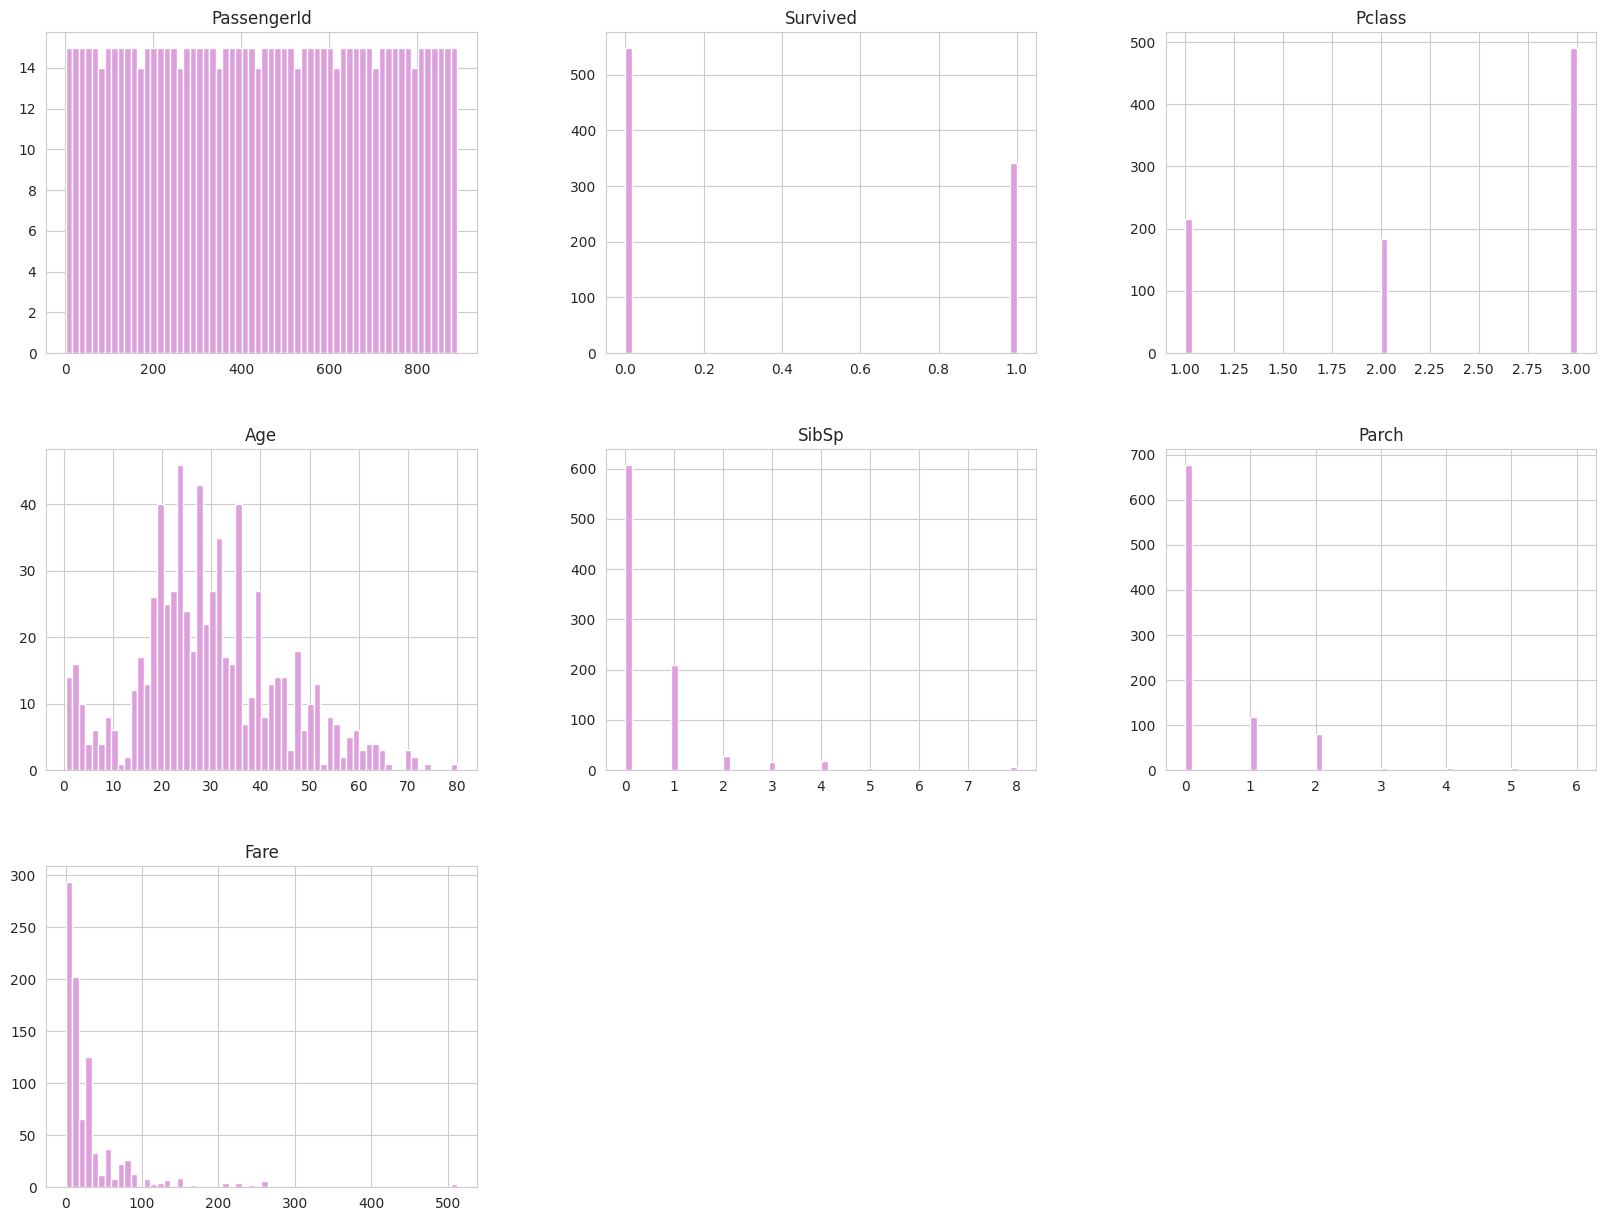

In [ ]:
training[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].hist(bins=60, figsize=(20, 15), color='plum')
plt.show()

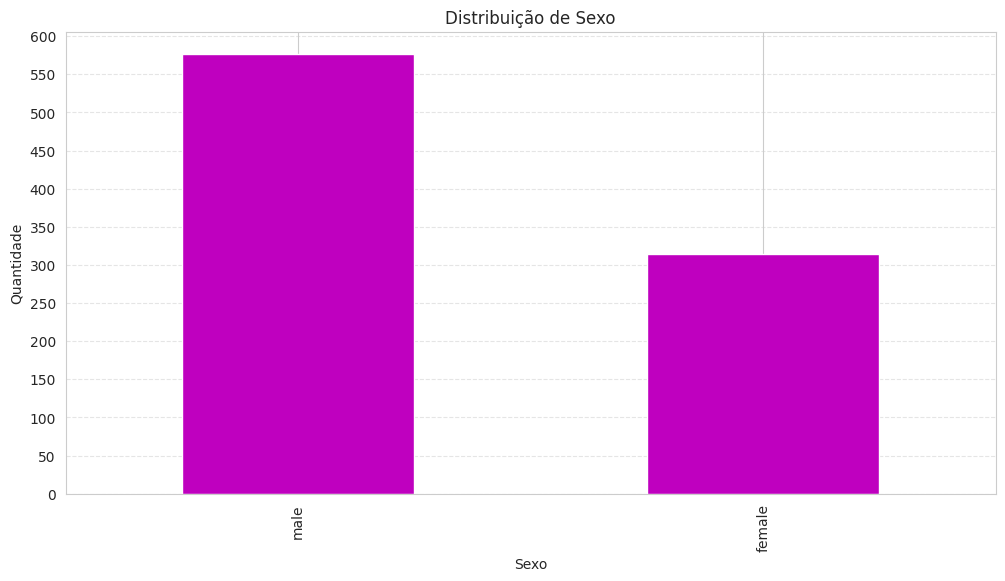

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
training['Sex'].value_counts().plot(kind='bar', color ='m')

plt.title('Distribuição de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')

max_val = training['Sex'].value_counts().max()
plt.yticks(range(0, max_val +50, 50))

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()



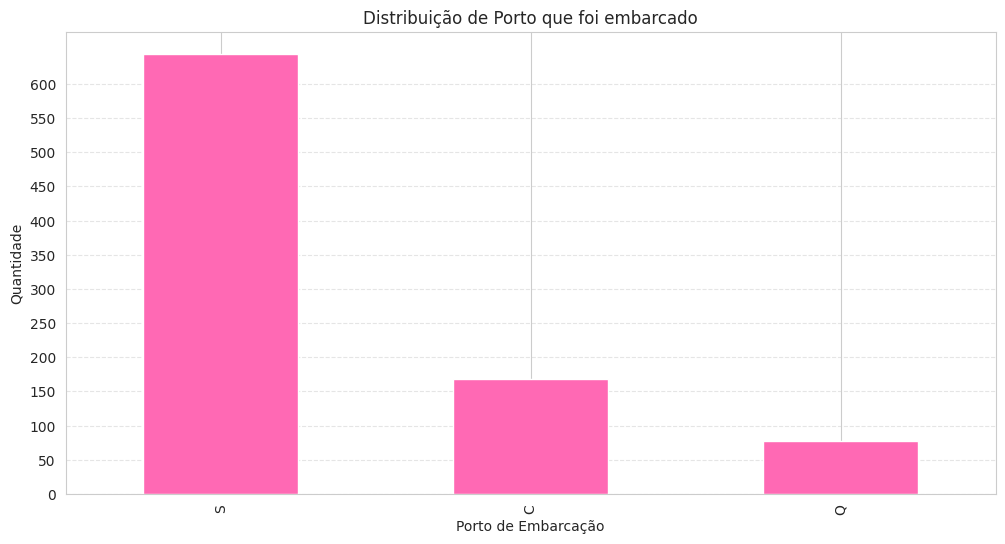

In [ ]:
plt.figure(figsize=(12, 6))
training['Embarked'].value_counts().plot(kind='bar', color ='hotpink')

plt.title('Distribuição de Porto que foi embarcado')
plt.xlabel('Porto de Embarcação')
plt.ylabel('Quantidade')

max_val = training['Sex'].value_counts().max()
plt.yticks(range(0, max_val +50, 50))

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()



## Correlações com a sobrevivência




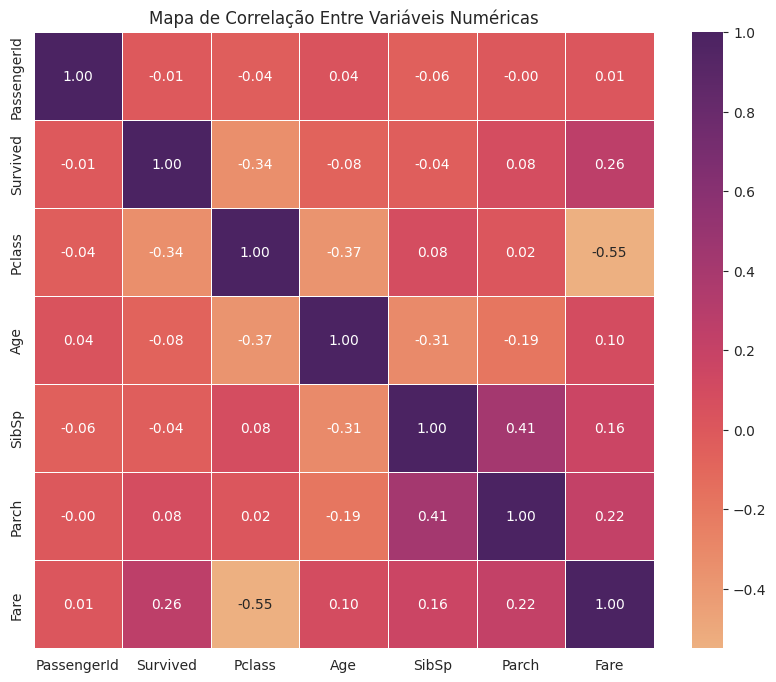

In [ ]:
import seaborn as sns

numeric_df = training.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='flare', linewidths=0.5, fmt=".2f")

plt.title('Mapa de Correlação Entre Variáveis Numéricas')
plt.show()

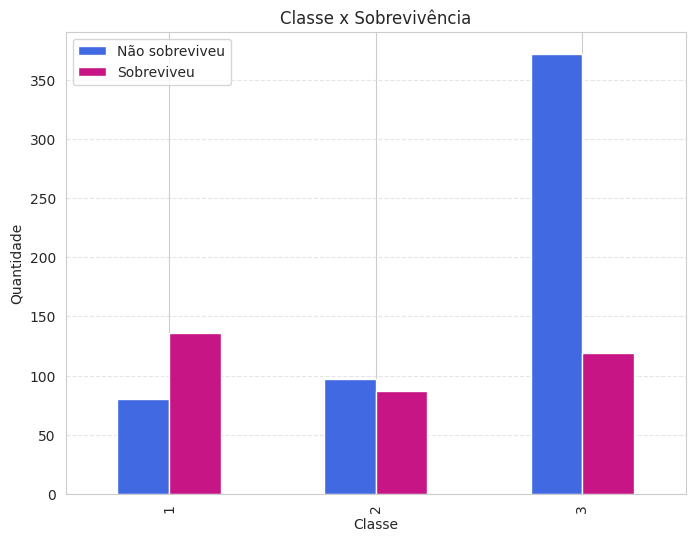

In [ ]:
table = pd.crosstab(index=training['Pclass'], columns=training['Survived'])

table.columns = ['Não sobreviveu', 'Sobreviveu']

table.plot(kind='bar', figsize=(8,6), color= ['royalblue','mediumvioletred'])

plt.title('Classe x Sobrevivência')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

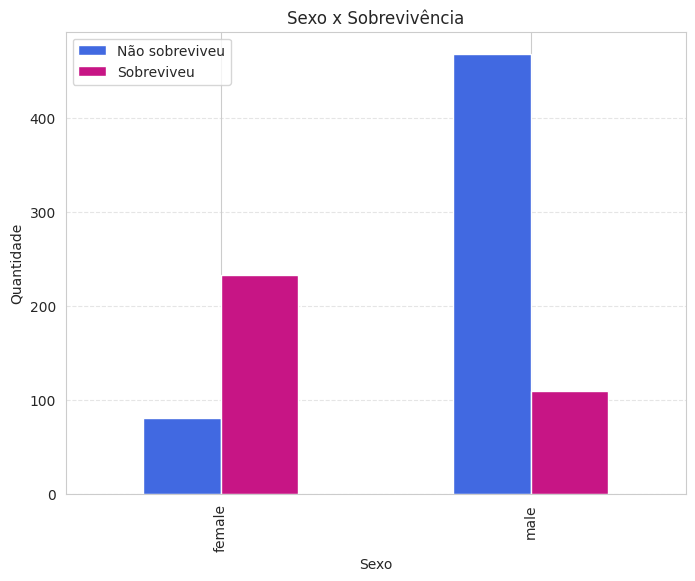

In [ ]:
table = pd.crosstab(index=training['Sex'], columns=training['Survived'])

table.columns = ['Não sobreviveu', 'Sobreviveu']

table.plot(kind='bar', figsize=(8,6), color= ['royalblue','mediumvioletred'])

plt.title('Sexo x Sobrevivência')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

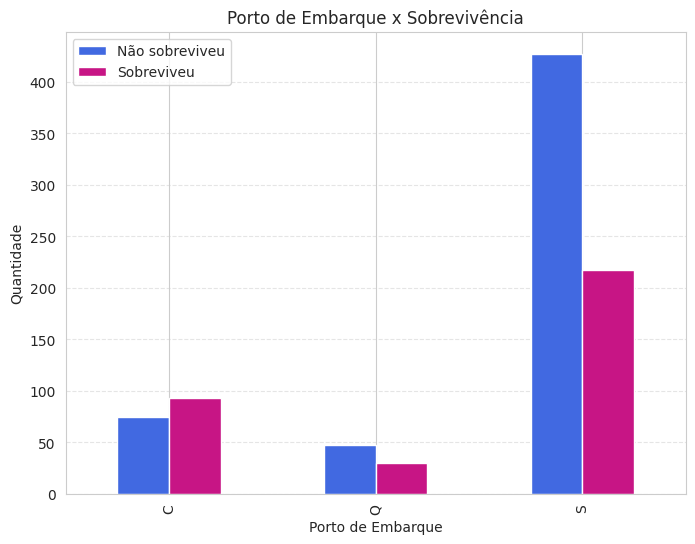

In [ ]:
table = pd.crosstab(index=training['Embarked'], columns=training['Survived'])

table.columns = ['Não sobreviveu', 'Sobreviveu']

table.plot(kind='bar', figsize=(8,6), color= ['royalblue','mediumvioletred'])

plt.title('Porto de Embarque x Sobrevivência')
plt.xlabel('Porto de Embarque')
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

## Análise final
Pelo heat map, é possível observar que as variáveis SinSp e Parch tem alta relação (de 0.41) além de terem correlação lógica por ambas se referirem a familiares. Isso indica que a junção das duas colunas pode ser benéfica ao modelo de treinamento devido a essa correlação. Além disso, a criação de faixas etárias pode ser interessante para o modelo por transformar uma variável inteira em uma categórica, facilitando a análise.


## Dados faltantes


In [ ]:
missing = training.isnull().sum()
print(missing)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


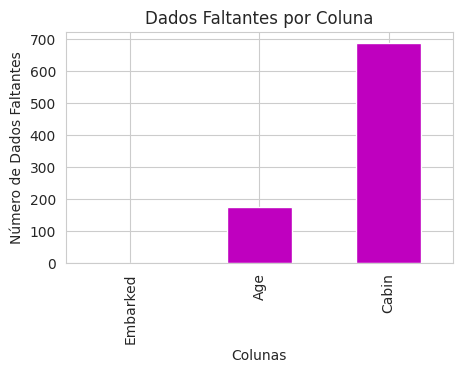

In [ ]:
missing = missing[missing > 0]
missing.sort_values(inplace=True)

missing.plot.bar(color='m', figsize=(5, 3))
plt.xlabel('Colunas')
plt.ylabel('Número de Dados Faltantes')
plt.title('Dados Faltantes por Coluna')

plt.show()

#Tratamento dos Dados
Com as análisas gráficas feitas acima, alguns pontos foram decididos sobre nosso dataset e serão discutidos nos pontos abaixo. Testaremos com o nosso modelo as mudanças convenientes comparando a acuracia do modelo usando o banco de dados antes de ser tratado e após ser tratado.



## Utilização do modelo sem o tratamento completo dos dados:

Não é possível usar o modelo sem fazer pelo menos um tratamento inicial dos dados já que o Decision Tree Classifier não consegue usar colunas com Strings para treinar o modelo. Com isso, existem algumas mudanças base que precisamos fazer primeiro:


1. Remover as colunas irrelevantes:

  Colunas de identificação como "PassegerID", "Name" e "Ticket" foram removidas já que não trazem informações úteis de treinamento

2. Preencher os valores ausentes da variável "Embarked" com o porto mais frequente no dataset:

  Como os valores faltantes de Embarked são menos de 1% dos valores as suas substituições não vão ter grande impacto

3. Aplicar one-hot encoding nas variáveis categóricas, convertendo cada categoria em um vetor binário:

  Esse processo permite que algoritmos de machine learning interpretem corretamente os dados, sem assumir uma ordem entre as categorias.

In [ ]:
base_train = training.drop(columns=['PassengerId', 'Name', 'Ticket'])
base_train['Embarked'] = base_train['Embarked'].fillna('S')
base_train = pd.get_dummies(base_train, columns=['Embarked', 'Sex', 'Pclass'], drop_first=True) # como não pode participar em mais de uma classificação dessas ao mesmo tempo o drop_first faz sentido
base_train['Cabin'] = base_train['Cabin'].notnull().astype(int)
base_train.head()

,Survived,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,False,True,True,False,True
1,1,38.0,1,0,71.2833,1,False,False,False,False,False
2,1,26.0,0,0,7.9250,0,False,True,False,False,True
3,1,35.0,1,0,53.1000,1,False,True,False,False,False
4,0,35.0,0,0,8.0500,0,False,True,True,False,True


##Separação de sets e balanceamento dos dados

Precisamos primeiro dividir o conjunto de treino (`training`) em `X_train`, `y_train`, `X_test`, `y_test`, `X_val` E `Y_val`, utilizando o conjunto de teste original para utilização na validação final.

In [ ]:
#  Separação dos sets
from sklearn.model_selection import train_test_split

# Separar rótulo
y = base_train['Survived']
X = base_train.drop(['Survived'], axis=1)

# Separa treino_val e teste (25% teste)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Separa treino e validação (25% de treino_val vira validação → 0.25 * 0.75 = ~18.75% do total)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

A acuracia do modelo acaba por não ser precisa caso a base de dados não esteja balanceada. Com isso, precisamos avaliar nosso conjunto de treino:

,proportion
Survived,
0,0.616162
1,0.383838


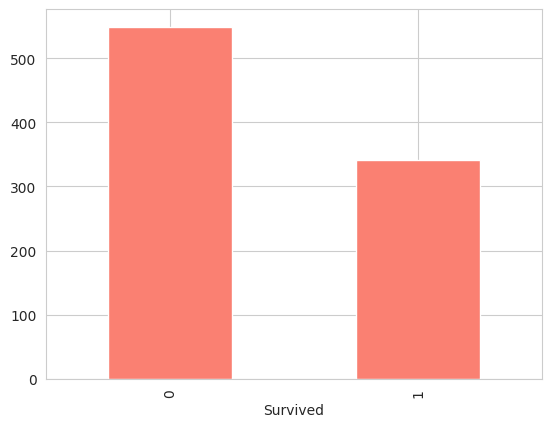

In [ ]:
base_train['Survived'].value_counts().plot(kind = 'bar', color = 'salmon')
base_train['Survived'].value_counts(normalize=True)

Como o dataset apresenta uma taxa de sobrevivência de aproximadamente 40%, ele é considerado balanceado. Mesmo assim, vamos utilizar a técnica de oversampling para diminuir a disparidade entre as classes e aumentar a acuracia do modelo. Só poderemos usar essa tecnica após tratar os dados então será feita mais a frente no projeto.

In [ ]:
# Treinar modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Avaliar modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia sem o tratamento dos dados: {accuracy:.4f}")


Acurácia sem o tratamento dos dados: 0.7309


Com isso, temos um valor base para usar como comparativo para as mudanças feitas a seguir no DataSet.

#1. Dados faltantes da idade e possível criação de faixas etárias
No atributo "Age" **19,5%** dos dados está faltante e também iremos testar duas abordagens:
- Substituir as idades faltantes pela mediana e a moda das idades presente;


Para as faixas etárias, como na analise gráfica foi vista uma clara separação de faixas etárias, a criação delas pode facilitar a análise e identificação de padrões. Novamente, vai se testado o modelo com e sem a criação dessa divisão


##Preenchimento com a media e verificação da acurácia

In [ ]:
# Preenchimento das idades faltantes com a mediana
X_train_modified = X_train.copy()
X_test_modified = X_test.copy()

X_test_modified['Age'] = X_test['Age'].fillna(X_test['Age'].mean())
X_train_modified['Age'] = X_train['Age'].fillna(X_train['Age'].mean())

print(X_train['Age'].mean())

# Verificacao se ainda ha valores sem idade em X_train
print(X_train_modified.isnull().sum())

29.383267326732675
Age           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked_Q    0
Embarked_S    0
Sex_male      0
Pclass_2      0
Pclass_3      0
dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_modified, y_train)

# Predict on the test set
y_pred = model.predict(X_test_modified)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model on the test set: {accuracy:.4f}")

Accuracy of the Decision Tree model on the test set: 0.7399


##Preenchimento das idades faltantes com a moda

In [ ]:
# Preenchimento das idades faltantes com a moda
X_train_modified2 = X_train.copy()
X_test_modified2 = X_test.copy()

X_test_modified2['Age'] = X_test['Age'].fillna(X_test['Age'].mode()[0])
X_train_modified2['Age'] = X_train['Age'].fillna(X_train['Age'].mode()[0])

print(X_test['Age'].mode()[0])
print(X_train['Age'].mode()[0])

# Verificacao se ainda ha valores sem idade em X_train
print(X_train_modified2.isnull().sum())

36.0
24.0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked_Q    0
Embarked_S    0
Sex_male      0
Pclass_2      0
Pclass_3      0
dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_modified2, y_train)

# Predict on the test set
y_pred = model.predict(X_test_modified2)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model on the test set: {accuracy:.4f}")

Accuracy of the Decision Tree model on the test set: 0.7309


##Preenchimento das idades faltantes com a Mediana

In [ ]:
# Preenchimento das idades faltantes com a mediana

X_test['Age'] = X_test['Age'].fillna(X_test['Age'].median())
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].median())

print(X_train['Age'].median())
print(X_test['Age'].median())

# Verificacao se ainda ha valores sem idade em X_train
print(X_train.isnull().sum())

28.0
29.0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked_Q    0
Embarked_S    0
Sex_male      0
Pclass_2      0
Pclass_3      0
dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model on the test set: {accuracy:.4f}")

Accuracy of the Decision Tree model on the test set: 0.7489


Obtivemos a maior acurácia utilizando a mediana em substituição às idades faltantes, por isso vamos seguir com essa abordagem.

##Acurácia com versus sem separação das idades em faixas  

### Criando Faixas Etárias

In [ ]:
# Criando faixas etárias com os limites desejados pelo usuário
faixas_etarias = base_train.copy()
faixas_etarias['Age'] = faixas_etarias['Age'].fillna(faixas_etarias['Age'].median())
bins = [0, 10, 20, 40, 60, np.inf]
labels = ['0-10', '10-20', '20-40', '40-60', '60+']
faixas_etarias['Age_Bin'] = pd.cut(faixas_etarias['Age'], bins=bins, labels=labels, right=False)
faixas_etarias = faixas_etarias.drop(columns=['Age'])

# Exibindo as primeiras linhas com a nova coluna
print(faixas_etarias.head())
print("\nContagem de valores por faixa etária:")
print(faixas_etarias['Age_Bin'].value_counts())

   Survived  SibSp  Parch     Fare  Cabin  Embarked_Q  Embarked_S  Sex_male  \
0         0      1      0   7.2500      0       False        True      True   
1         1      1      0  71.2833      1       False       False     False   
2         1      0      0   7.9250      0       False        True     False   
3         1      1      0  53.1000      1       False        True     False   
4         0      0      0   8.0500      0       False        True      True   

   Pclass_2  Pclass_3 Age_Bin  
0     False      True   20-40  
1     False     False   20-40  
2     False      True   20-40  
3     False     False   20-40  
4     False      True   20-40  

Contagem de valores por faixa etária:
Age_Bin
20-40    564
40-60    137
10-20    102
0-10      62
60+       26
Name: count, dtype: int64


##*Modelo* com faixas etarias

In [ ]:
# Criar cópias do dataset para garantir que não estamos alterando os originais
X_train_age_bins = X_train.copy()
X_test_age_bins = X_test.copy()

# Criar faixas etárias com os limites desejados
bins = [0, 10, 20, 40, 60, np.inf]
labels = ['0-10', '10-20', '20-40', '40-60', '60+']
X_train_age_bins['Age_Bin'] = pd.cut(X_train_age_bins['Age'], bins=bins, labels=labels, right=False)
X_test_age_bins['Age_Bin'] = pd.cut(X_test_age_bins['Age'], bins=bins, labels=labels, right=False)

# Aplicar One-Hot Encoding na nova coluna categórica
X_train_age_bins = pd.get_dummies(X_train_age_bins, columns=['Age_Bin'], drop_first=True)
X_test_age_bins = pd.get_dummies(X_test_age_bins, columns=['Age_Bin'], drop_first=True)

# Remover a coluna 'Age' original, pois foi substituída pelas faixas etárias
X_train_age_bins.drop(columns=['Age'], inplace=True)
X_test_age_bins.drop(columns=['Age'], inplace=True)

# Verificar valores ausentes no restante do dataset
print("Valores ausentes no dataset (abordagem Faixas Etárias):")
print(X_train_age_bins.isnull().sum())

# Treinar o modelo de Árvore de Decisão
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_age_bins, y_train)

# Avaliar o modelo no conjunto de teste
y_pred = model.predict(X_test_age_bins)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia (com Faixas Etárias para 'Age'): {accuracy:.4f}")

Valores ausentes no dataset (abordagem Faixas Etárias):
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked_Q       0
Embarked_S       0
Sex_male         0
Pclass_2         0
Pclass_3         0
Age_Bin_10-20    0
Age_Bin_20-40    0
Age_Bin_40-60    0
Age_Bin_60+      0
dtype: int64
Acurácia (com Faixas Etárias para 'Age'): 0.7713


### Preparando Dados Sem Faixas Etárias

In [ ]:
# Criar cópias dos dataframes de treino e teste para não modificar os originais
X_train_numeric = X_train.copy() # Usar X_train do split anterior
X_test_numeric = X_test.copy()   # Usar X_test do split anterior

# Preencher idade com a moda do conjunto de treino original (calculada anteriormente)
# Certifique-se de que 'most_frequent_age_train' está definido. Se não, recalcule-o.
if 'most_frequent_age_train' not in locals():
    try:
        df_train_original = pd.read_csv('train.csv')
        most_frequent_age_train = df_train_original['Age'].median()
        print(f"Moda da idade no treino original calculada: {most_frequent_age_train}")
    except FileNotFoundError:
        print("Erro: Arquivo 'train.csv' não encontrado para calcular a moda da idade.")
        # Defina um valor padrão ou trate o erro de outra forma se o arquivo não for encontrado
        most_frequent_age_train = 28.0 # Valor padrão razoável caso o arquivo não seja encontrado

X_train_numeric['Age'] = X_train_numeric['Age'].fillna(most_frequent_age_train)
X_test_numeric['Age'] = X_test_numeric['Age'].fillna(most_frequent_age_train)

# Remover a coluna 'Age_Bin' se existir, só por segurança (embora nesses dataframes não deva existir)
X_train_numeric = X_train_numeric.drop(columns=['Age_Bin'], errors='ignore')
X_test_numeric = X_test_numeric.drop(columns=['Age_Bin'], errors='ignore')

# Verificar se há valores nulos após o preenchimento
print("\nValores nulos em X_train_numeric após preenchimento da idade:")
print(X_train_numeric.isnull().sum())

print("\nValores nulos em X_test_numeric após preenchimento da idade:")
print(X_test_numeric.isnull().sum())

# Os conjuntos y_train e y_test já foram definidos no split anterior
print("\nDataframes X_train_numeric e X_test_numeric preparados.")


Valores nulos em X_train_numeric após preenchimento da idade:
Age           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked_Q    0
Embarked_S    0
Sex_male      0
Pclass_2      0
Pclass_3      0
dtype: int64

Valores nulos em X_test_numeric após preenchimento da idade:
Age           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked_Q    0
Embarked_S    0
Sex_male      0
Pclass_2      0
Pclass_3      0
dtype: int64

Dataframes X_train_numeric e X_test_numeric preparados.


### Treinando o Modelo Sem Faixas Etárias


In [ ]:
# Aplicar SMOTE aos dados de treino numéricos
smote_numeric = SMOTE(random_state=42)
X_resampled_numeric, y_resampled_numeric = smote_numeric.fit_resample(X_train_numeric, y_train) # y_train já está definido do split anterior

# Inicializar e treinar o modelo de Árvore de Decisão com os dados numéricos resampleados
model_numeric = DecisionTreeClassifier(random_state=42)
model_numeric.fit(X_resampled_numeric, y_resampled_numeric)

# Prever no conjunto de teste numérico
y_pred_numeric = model_numeric.predict(X_test_numeric)

# Avaliar a acurácia no conjunto de teste (usando y_test do split original)
accuracy_numeric = accuracy_score(y_test, y_pred_numeric) # y_test já está definido do split anterior
print(f"Accuracy of the Decision Tree model without age bins on the test set: {accuracy_numeric:.4f}")

Accuracy of the Decision Tree model without age bins on the test set: 0.7175


### Comparação de Acurácia: Com Faixas Etárias vs. Sem Faixas Etárias

Vamos comparar as acurácias obtidas pelos dois modelos:

- Modelo com Faixas Etárias: `accuracy_age_bins`
- Modelo sem Faixas Etárias: `accuracy_numeric`

In [ ]:
print(f"Acurácia do modelo com faixas etárias: {accuracy:.4f}")
print(f"Acurácia do modelo sem faixas etárias: {accuracy_numeric:.4f}")

Acurácia do modelo com faixas etárias: 0.7713
Acurácia do modelo sem faixas etárias: 0.7175


Obtivemos uma maior acurácia com a divisão em faixas etárias: 77.13%

#2. Dados faltantes em Cabin
No tributo "Cabin" **77%** dos dados está faltante, com isso iremos testar duas abordagens:
- Considerar o atributo como um bool, que é 1 quando temos o valor pra aquela posição do data set e 0 quando não temos
- Excluir totalmente o atributo do nosso dataset e não considera-lo na análise

In [ ]:
#Abordagem 1: Transformar 'Cabin' em booleano (1 se tem valor, 0 se não tem)

# Criar cópias do dataset
X_train_cabin_bool = X_train.copy()
X_test_cabin_bool = X_test.copy()

# Criar atributo booleano para indicar presença de 'Cabin'
X_train_cabin_bool['Cabin'] = X_train_cabin_bool['Cabin'].notnull().astype(int)
X_test_cabin_bool['Cabin'] = X_test_cabin_bool['Cabin'].notnull().astype(int)

# Verificar valores ausentes no restante do dataset
print("Valores ausentes no dataset (abordagem Cabin bool):")
print(X_train_cabin_bool.isnull().sum())


# Treinar modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_cabin_bool, y_train)

# Avaliar modelo
y_pred = model.predict(X_test_cabin_bool)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia (Cabin como bool): {accuracy:.4f}")




Valores ausentes no dataset (abordagem Cabin bool):
Age           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked_Q    0
Embarked_S    0
Sex_male      0
Pclass_2      0
Pclass_3      0
dtype: int64
Acurácia (Cabin como bool): 0.6996


In [ ]:
#Abordagem 2: Excluir 'Cabin' do dataset

# Criar cópias do dataset
X_train_no_cabin = X_train.copy()
X_test_no_cabin = X_test.copy()

# Remover a coluna 'Cabin'
if 'Cabin' in X_train_no_cabin.columns:
    X_train_no_cabin = X_train_no_cabin.drop(columns=['Cabin'])
if 'Cabin' in X_test_no_cabin.columns:
    X_test_no_cabin = X_test_no_cabin.drop(columns=['Cabin'])

# Verificar valores ausentes no restante do dataset
print("Valores ausentes no dataset (sem Cabin):")
print(X_train_no_cabin.isnull().sum())


# Treinar modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_no_cabin, y_train)

# Avaliar modelo
y_pred = model.predict(X_test_no_cabin)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia (sem Cabin): {accuracy:.4f}")



Valores ausentes no dataset (sem Cabin):
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
Sex_male      0
Pclass_2      0
Pclass_3      0
dtype: int64
Acurácia (sem Cabin): 0.7130


Como foi visto anteriormente, os dados de Cabin são 77% faltantes, e por isso, as duas abordagens acima obtiveram a acurácia semelhante, demonstrando que o parâmetro Cabin traz pouquíssima informação útil e não afeta muito a variável alvo (Survived). Mesmo com a diferença pequena, decidimos por excluir 'Cabin' do dataset pela sua acurácia um pouco maior.

#3. Unir as variáveis "SibSp" e "Parch" em uma nova variável, representando o total de familiares a bordo
Já que ambas possuem alta correlação e significados semelhantes testaremos:
- Utiliza-las da maneira que estão no data set
- Soma-las em uma variável "Family"

In [ ]:
# Abordagem 1: Unir "SibSp" e "Parch" em uma nova variável "Family"

# Criar cópias do dataset
X_train_family = X_train.copy()
X_test_family = X_test.copy()

# Criar o novo atributo somando as colunas e depois removê-las
X_train_family['Family'] = X_train_family['SibSp'] + X_train_family['Parch']
X_test_family['Family'] = X_test_family['SibSp'] + X_test_family['Parch']
X_train_family.drop(columns=['SibSp', 'Parch'], inplace=True)
X_test_family.drop(columns=['SibSp', 'Parch'], inplace=True)

# Verificar valores ausentes no restante do dataset
print("Valores ausentes no dataset (abordagem Family):")
print(X_train_family.isnull().sum())

# Treinar modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_family, y_train)

# Avaliar modelo
y_pred = model.predict(X_test_family)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia (com variável 'Family'): {accuracy:.4f}")

Valores ausentes no dataset (abordagem Family):
Age           0
Fare          0
Cabin         0
Embarked_Q    0
Embarked_S    0
Sex_male      0
Pclass_2      0
Pclass_3      0
Family        0
dtype: int64
Acurácia (com variável 'Family'): 0.7578


In [ ]:
# Abordagem 2: Manter "SibSp" e "Parch" como variáveis separadas

# Criar cópias do dataset para garantir que não estamos alterando os originais
X_train_not_united = X_train.copy()
X_test_not_united = X_test.copy()

# As variáveis já estão separadas, então não há passo de engenharia de features aqui

# Verificar valores ausentes no restante do dataset
print("Valores ausentes no dataset (abordagem com variáveis separadas):")
print(X_train_not_united.isnull().sum())

# Treinar o modelo de Árvore de Decisão
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_not_united, y_train)

# Avaliar o modelo no conjunto de teste
y_pred = model.predict(X_test_not_united)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia (com 'SibSp' e 'Parch' separadas): {accuracy:.4f}")

Valores ausentes no dataset (abordagem com variáveis separadas):
Age           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked_Q    0
Embarked_S    0
Sex_male      0
Pclass_2      0
Pclass_3      0
dtype: int64
Acurácia (com 'SibSp' e 'Parch' separadas): 0.7489


In [ ]:
# Criar cópias do dataset
X_train_isalone = X_train.copy()
X_test_isalone = X_test.copy()

# Criar uma coluna temporária para o tamanho total da família
X_train_isalone['FamilySize'] = X_train_isalone['SibSp'] + X_train_isalone['Parch']
X_test_isalone['FamilySize'] = X_test_isalone['SibSp'] + X_test_isalone['Parch']

# Criar a nova variável booleana 'IsAlone'
X_train_isalone['IsAlone'] = 0
X_test_isalone['IsAlone'] = 0
X_train_isalone.loc[X_train_isalone['FamilySize'] == 0, 'IsAlone'] = 1
X_test_isalone.loc[X_test_isalone['FamilySize'] == 0, 'IsAlone'] = 1

# Remover as colunas originais e a temporária
X_train_isalone.drop(columns=['SibSp', 'Parch', 'FamilySize'], inplace=True)
X_test_isalone.drop(columns=['SibSp', 'Parch', 'FamilySize'], inplace=True)

# Verificar valores ausentes no restante do dataset
print("Valores ausentes no dataset (abordagem IsAlone):")
print(X_train_isalone.isnull().sum())

# Treinar modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_isalone, y_train)

# Avaliar modelo
y_pred = model.predict(X_test_isalone)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia (com variável 'IsAlone'): {accuracy:.4f}")

Valores ausentes no dataset (abordagem IsAlone):
Age           0
Fare          0
Cabin         0
Embarked_Q    0
Embarked_S    0
Sex_male      0
Pclass_2      0
Pclass_3      0
IsAlone       0
dtype: int64
Acurácia (com variável 'IsAlone'): 0.7578


In [ ]:
# Criar cópias do dataset
X_train_fcat = X_train.copy()
X_test_fcat = X_test.copy()

# Criar uma coluna temporária para o tamanho total da família
X_train_fcat['FamilySize'] = X_train_fcat['SibSp'] + X_train_fcat['Parch']
X_test_fcat['FamilySize'] = X_test_fcat['SibSp'] + X_test_fcat['Parch']

# Criar a nova variável categórica 'FamilyGroup'
# Primeiro, definimos a categoria padrão como 'Small'
X_train_fcat['FamilyGroup'] = 'Small'
X_test_fcat['FamilyGroup'] = 'Small'

# Depois, ajustamos para 'Alone' e 'Large' com base no tamanho da família
X_train_fcat.loc[X_train_fcat['FamilySize'] == 0, 'FamilyGroup'] = 'Alone'
X_test_fcat.loc[X_test_fcat['FamilySize'] == 0, 'FamilyGroup'] = 'Alone'

X_train_fcat.loc[X_train_fcat['FamilySize'] >= 4, 'FamilyGroup'] = 'Large'
X_test_fcat.loc[X_test_fcat['FamilySize'] >= 4, 'FamilyGroup'] = 'Large'

# Aplicar One-Hot Encoding na nova coluna categórica
X_train_fcat = pd.get_dummies(X_train_fcat, columns=['FamilyGroup'], drop_first=True)
X_test_fcat = pd.get_dummies(X_test_fcat, columns=['FamilyGroup'], drop_first=True)

# Remover as colunas originais e a temporária
X_train_fcat.drop(columns=['SibSp', 'Parch', 'FamilySize'], inplace=True)
X_test_fcat.drop(columns=['SibSp', 'Parch', 'FamilySize'], inplace=True)

# Verificar valores ausentes no restante do dataset
print("Valores ausentes no dataset (abordagem Categoria de Família):")
print(X_train_fcat.isnull().sum())


# Treinar o modelo de Árvore de Decisão
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_fcat, y_train)

# Avaliar o modelo no conjunto de teste
y_pred = model.predict(X_test_fcat)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia (com Categoria de Família): {accuracy:.4f}")

Valores ausentes no dataset (abordagem Categoria de Família):
Age                  0
Fare                 0
Cabin                0
Embarked_Q           0
Embarked_S           0
Sex_male             0
Pclass_2             0
Pclass_3             0
FamilyGroup_Large    0
FamilyGroup_Small    0
dtype: int64
Acurácia (com Categoria de Família): 0.7578


Apesar de terem sido testadas maneiras mais rebuscadas de relacionar SibSp e Parch, vamos optar somar de forma simples gerou maior acurácia

#Aplicando as conclusões das analises feitas num novo modelo final

Mudanças no DataSet escolhidas:

- com faixa etárias
- Sem Cabin
- Somar SibSp e Parch de maneira simples


In [ ]:
#Declarando um novo DataSet - oq será utilizado para treinar o modelo final
DS_final = base_train.copy()

#Aplicando as faixas etárias
bins = [0, 10, 20, 40, 60, np.inf]
labels = ['0-10', '10-20', '20-40', '40-60', '60+']
DS_final['Age_Bin'] = pd.cut(DS_final['Age'], bins=bins, labels=labels, right=False)
DS_final = DS_final.drop(columns=['Age'])
DS_final = pd.get_dummies(DS_final, columns=['Age_Bin'], drop_first=True)

print('Aplicando as faixas etárias:')
print(DS_final.head())
print('\n')

#Retirando Cabin
DS_final = DS_final.drop(columns=['Cabin'])

print('Removendo Cabin:')
print(DS_final.head())
print('\n')

#Somando SibSp e Parcg de maneira simples
DS_final['Family'] = DS_final['SibSp'] + DS_final['Parch']
DS_final.drop(columns=['SibSp', 'Parch'], inplace=True)

print('Somando SibSp e Parcg de maneira simples:')
print(DS_final.head())
print('\n')

Aplicando as faixas etárias:
   Survived  SibSp  Parch     Fare  Cabin  Embarked_Q  Embarked_S  Sex_male  \
0         0      1      0   7.2500      0       False        True      True   
1         1      1      0  71.2833      1       False       False     False   
2         1      0      0   7.9250      0       False        True     False   
3         1      1      0  53.1000      1       False        True     False   
4         0      0      0   8.0500      0       False        True      True   

   Pclass_2  Pclass_3  Age_Bin_10-20  Age_Bin_20-40  Age_Bin_40-60  \
0     False      True          False           True          False   
1     False     False          False           True          False   
2     False      True          False           True          False   
3     False     False          False           True          False   
4     False      True          False           True          False   

   Age_Bin_60+  
0        False  
1        False  
2        False  
3      

Agora com esse novo DataSet, com o tratamento de dados realizado, iremos refazer a divisão entre treino, validação e teste

In [ ]:
#  Separação dos sets
#from sklearn.model_selection import train_test_split

# Separar rótulo
y_final = DS_final['Survived']
X_final = DS_final.drop(['Survived'], axis=1)

# Separa treino_val e teste (25% teste)
X_train_val_final, X_test_final, y_train_val_final, y_test_final = train_test_split(X_final, y_final, test_size=0.25, random_state=42)

# Separa treino e validação (25% de treino_val vira validação → 0.25 * 0.75 = ~18.75% do total)
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(X_train_val_final, y_train_val_final, test_size=0.25, random_state=42)

Checando o balenceamento do DS_final

,proportion
Survived,
0,0.616162
1,0.383838


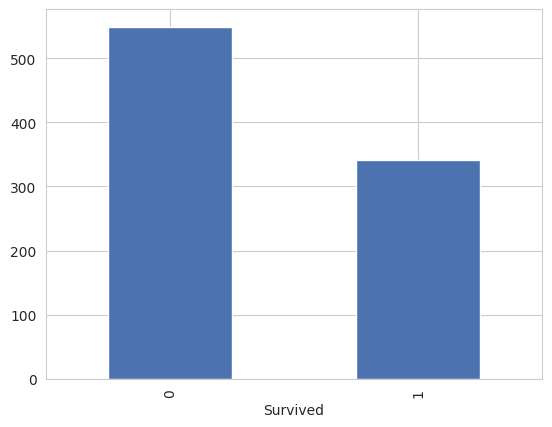

In [ ]:
DS_final['Survived'].value_counts().plot(kind = 'bar')
DS_final['Survived'].value_counts(normalize=True)

Nota-se que o DS_final está desbalenceado, com isso utilizaremos a tecnica de *oversampling* para balanceá-lo

In [ ]:
smote = SMOTE()
X_resampled_final, y_resampled_final = smote.fit_resample(X_train_final, y_train_final)

,proportion
Survived,
0,0.5
1,0.5


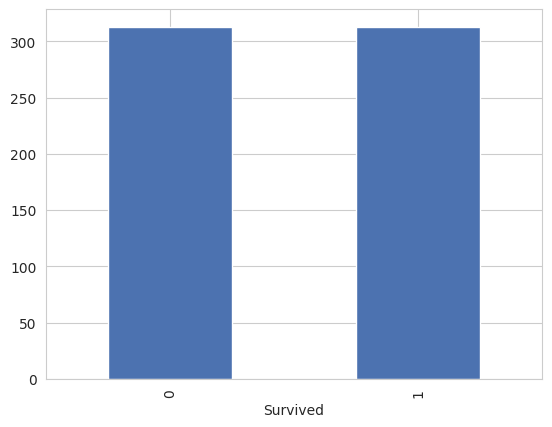

In [ ]:
y_resampled_final.value_counts().plot(kind = 'bar')
y_resampled_final.value_counts(normalize=True)

Agora os dados estão balanceados, com isso vamos treinar o modelo

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

clf = clf.fit(X_resampled_final, y_resampled_final)
y_trainclf_pred = clf.predict(X_resampled_final)
y_testclf_pred = clf.predict(X_test_final)

print(f'Acurácia de Treino: {accuracy_score(y_resampled_final, y_trainclf_pred)}')
print(f'Acurácia de Validação: {accuracy_score(y_test_final, y_testclf_pred)}')

Acurácia de Treino: 0.9568690095846646
Acurácia de Validação: 0.7802690582959642


Houve *overfitting*, com isso iremos iniciar um processo de análise do impacto de cada Hiperparâmetro para consguimos construir o melhor modelo para o nosso problema dado o nosso data set

[Text(0.5, 0.875, 'Sex_male <= 0.5\ngini = 0.5\nsamples = 626\nvalue = [313, 313]'),
 Text(0.25, 0.625, 'Pclass_3 <= 0.5\ngini = 0.307\nsamples = 248\nvalue = [47, 201]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Family <= 2.5\ngini = 0.051\nsamples = 152\nvalue = [4, 148]'),
 Text(0.0625, 0.125, 'gini = 0.03\nsamples = 133\nvalue = [2, 131]'),
 Text(0.1875, 0.125, 'gini = 0.188\nsamples = 19\nvalue = [2, 17]'),
 Text(0.375, 0.375, 'Fare <= 20.663\ngini = 0.495\nsamples = 96\nvalue = [43, 53]'),
 Text(0.3125, 0.125, 'gini = 0.458\nsamples = 79\nvalue = [28, 51]'),
 Text(0.4375, 0.125, 'gini = 0.208\nsamples = 17\nvalue = [15, 2]'),
 Text(0.75, 0.625, 'Fare <= 10.194\ngini = 0.417\nsamples = 378\nvalue = [266, 112]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Age_Bin_20-40 <= 0.5\ngini = 0.265\nsamples = 165\nvalue = [139.0, 26.0]'),
 Text(0.5625, 0.125, 'gini = 0.094\nsamples = 81\nvalue = [77, 4]'),
 Text(0.6875, 0.125, 'gini = 0.387\nsamples = 84\nvalue = [62, 22]

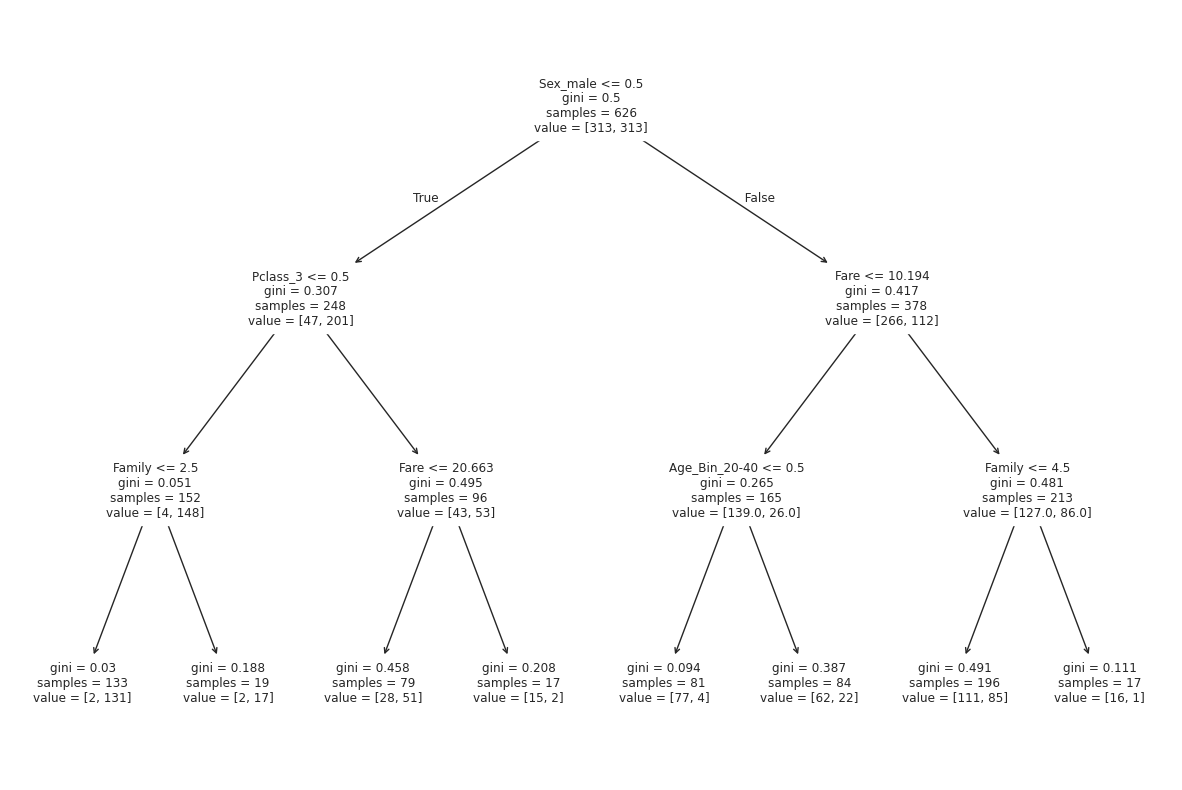

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3)

clf = clf.fit(X_resampled_final, y_resampled_final)
y_trainclf_pred = clf.predict(X_resampled_final)
y_testclf_pred = clf.predict(X_test_final)

plt.figure(figsize=(15,10))
tree.plot_tree(clf, feature_names=X_resampled_final.columns)

Testando de maneira geral e de forma unica e depois analisando os valores num gráfico, com isso os valores ficam estruturadas de uma maneira prática e didática, otimizando assim o nosso processo de decisão e também evitando que foquemos em aspectos que não trazem tanto impacto para o modelo

In [ ]:
DT_t_max_depth = []
DT_v_max_depth = []

for max_depth in range (1, 20, 2):
    DT = tree.DecisionTreeClassifier(max_depth=max_depth)

    DT.fit(X_resampled_final, y_resampled_final)
    y_train_pred = DT.predict(X_resampled_final)
    y_test_pred = DT.predict(X_test_final)

    DT_t_max_depth.append(accuracy_score(y_resampled_final, y_train_pred))
    DT_v_max_depth.append(accuracy_score(y_test_final, y_test_pred))

###########################################################################

DT_t_min_samples_leaf = []
DT_v_min_samples_leaf = []

for min_samples_leaf in range (1, 460, 20):
    DT = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)

    DT.fit(X_resampled_final, y_resampled_final)
    y_train_pred = DT.predict(X_resampled_final)
    y_test_pred = DT.predict(X_test_final)

    DT_t_min_samples_leaf.append(accuracy_score(y_resampled_final, y_train_pred))
    DT_v_min_samples_leaf.append(accuracy_score(y_test_final, y_test_pred))

###########################################################################

DT_t_min_samples_split = []
DT_v_min_samples_split = []

for min_samples_split in range (2, 1000, 50):
    DT = tree.DecisionTreeClassifier(min_samples_split=min_samples_split)

    DT.fit(X_resampled_final, y_resampled_final)
    y_train_pred = DT.predict(X_resampled_final)
    y_test_pred = DT.predict(X_test_final)

    DT_t_min_samples_split.append(accuracy_score(y_resampled_final, y_train_pred))
    DT_v_min_samples_split.append(accuracy_score(y_test_final, y_test_pred))

###########################################################################

DT_t_max_leaf_nodes = []
DT_v_max_leaf_nodes = []

for max_leaf_nodes in range (2, 20, 2):
    DT = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes)

    DT.fit(X_resampled_final, y_resampled_final)
    y_train_pred = DT.predict(X_resampled_final)
    y_test_pred = DT.predict(X_test_final)

    DT_t_max_leaf_nodes.append(accuracy_score(y_resampled_final, y_train_pred))
    DT_v_max_leaf_nodes.append(accuracy_score(y_test_final, y_test_pred))

Plotando os gráficos para analisarmos o comportamento de cada Hiperparâmetro e seus impactos para a árvore de decisão

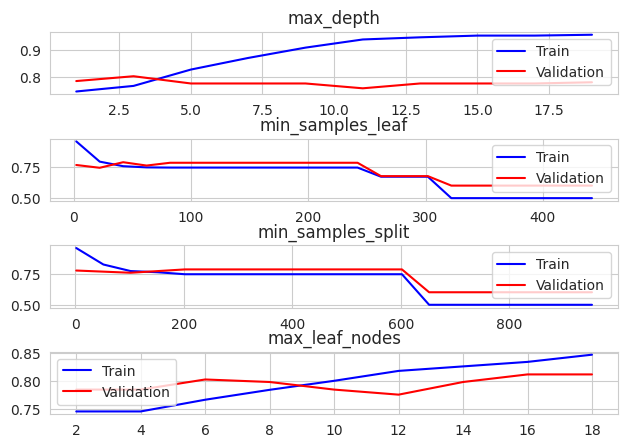

In [ ]:
fig, axs = plt.subplots(4)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

axs[0].plot(range(1, 20, 2), DT_t_max_depth, '-b', label='Train')
axs[0].plot(range(1, 20, 2), DT_v_max_depth, '-r', label='Validation')
axs[0].set_title("max_depth")
axs[0].legend(loc='best')


axs[1].plot(range(2, 450, 20), DT_t_min_samples_leaf, '-b', label='Train')
axs[1].plot(range(2, 450, 20), DT_v_min_samples_leaf, '-r', label='Validation')
axs[1].set_title("min_samples_leaf")
axs[1].legend(loc='best')

axs[2].plot(range(2, 1000, 50), DT_t_min_samples_split, '-b', label='Train')
axs[2].plot(range(2, 1000, 50), DT_v_min_samples_split, '-r', label='Validation')
axs[2].set_title("min_samples_split")
axs[2].legend(loc='best')

axs[3].plot(range(2, 20, 2), DT_t_max_leaf_nodes, '-b', label='Train')
axs[3].plot(range(2, 20, 2), DT_v_max_leaf_nodes, '-r', label='Validation')
axs[3].set_title("max_leaf_nodes")
axs[3].legend(loc='best')

plt.show()

Vamos ajustar os valores de todos os parâmetros com base na análise desses valores e em tentativas e erros a fim de garantir ao máximo a mitigação do **overfitting**.

**Overfitting** acontece quando a Acurácia de Treino é significativamente mais alta que a Acurácia de Validação. Pois isso significa que o modelo "decorou" os dados de treino, mas não consegue generalizar bem para dados novos.

Assim, quanto mais próximo o valor da acurácia de validação em comparação à acurácia de treino, melhor a performance do nosso modelo.

## Alteração dos Hiper Parâmetros

Ajustamos os parâmetros com valores empíricos, adquiridos pela análise dos gráficos anteriores, a fim de evitar ao máximo o overfitting.

No caso do parâemetro `min_samples_leaf`, foi utilizado o valor 20. Mesmo que no gráfico tenha apresentado que valores por volta do 50 até 220 apresentaram o um mesmo valor para o treino e para validação, o valor de 20 foi o que perfomou melhor, isto é, onde o valor das duas acurácias foram mais próximas e com seus maiores valores.

In [ ]:
DT = tree.DecisionTreeClassifier(min_samples_leaf=20)

DT.fit(X_resampled_final, y_resampled_final)
y_train_pred = DT.predict(X_resampled_final)
y_test_pred = DT.predict(X_test_final)

print(f'Acurácia de Treino: {accuracy_score(y_resampled_final, y_train_pred)}')
print(f'Acurácia de Validação: {accuracy_score(y_test_final, y_test_pred)}')

Acurácia de Treino: 0.8083067092651757
Acurácia de Validação: 0.7892376681614349


No caso do parâemetro min_samples_split, foi utilizado o valor de 150. Valores menores (próximos de 20, 30) não conseguiram evitar o overfitting.

In [ ]:
DT = tree.DecisionTreeClassifier(min_samples_split=150)

DT.fit(X_resampled_final, y_resampled_final)
y_train_pred = DT.predict(X_resampled_final)
y_test_pred = DT.predict(X_test_final)

print(f'Acurácia de Treino: {accuracy_score(y_resampled_final, y_train_pred)}')
print(f'Acurácia de Validação: {accuracy_score(y_test_final, y_test_pred)}')

Acurácia de Treino: 0.7619808306709265
Acurácia de Validação: 0.7713004484304933


Já no caso do parâemetro **max_leaf_nodes**, foi utilizado o valor de 10. Valores maiores não conseguiram evitar o overfitting, por isso adotamos a abordagem de utilizar um valor menor para tornar árvore mais simples e, assim, evitar que o modelo estivesse "decorando" os dados de treino.

In [ ]:
DT = tree.DecisionTreeClassifier(max_leaf_nodes=16)

DT.fit(X_resampled_final, y_resampled_final)
y_train_pred = DT.predict(X_resampled_final)
y_test_pred = DT.predict(X_test_final)

print(f'Acurácia de Treino: {accuracy_score(y_resampled_final, y_train_pred)}')
print(f'Acurácia de Validação: {accuracy_score(y_test_final, y_test_pred)}')

Acurácia de Treino: 0.8338658146964856
Acurácia de Validação: 0.8116591928251121


Assim como no exemplo acima, o uso de valores como 150, 100 estava causando um grande overfitting (96% da acurácia de treino versus 76% da acurácia de validação). Por isso, testamos diferentes valores e, em geral, quanto menor o valor utilizado, menor o overfitting.
Por isso, adotamos o valor bem menor que os demais de 5, uma vez que testes com valores até mesmo de 20 estavam causando overfitting.

In [ ]:
DT = tree.DecisionTreeClassifier(max_depth=5)

DT.fit(X_resampled_final, y_resampled_final)
y_train_pred = DT.predict(X_resampled_final)
y_test_pred = DT.predict(X_test_final)

print(f'Acurácia de Treino: {accuracy_score(y_resampled_final, y_train_pred)}')
print(f'Acurácia de Validação: {accuracy_score(y_test_final, y_test_pred)}')

Acurácia de Treino: 0.8274760383386581
Acurácia de Validação: 0.7757847533632287


##Modelo com os melhores valores dos Hiper Parâmetros

In [ ]:
DT = tree.DecisionTreeClassifier(min_samples_leaf=20, min_samples_split=150, max_leaf_nodes=16, max_depth=5)

DT.fit(X_resampled_final, y_resampled_final)
y_train_pred = DT.predict(X_resampled_final)
y_test_pred = DT.predict(X_test_final)

print(f'Acurácia de Treino: {accuracy_score(y_resampled_final, y_train_pred)}')
print(f'Acurácia de Validação: {accuracy_score(y_test_final, y_test_pred)}')

Acurácia de Treino: 0.7603833865814696
Acurácia de Validação: 0.7802690582959642


## Conclusão

Assim, percebe-se que os valores obtidos de acurácia de treino e de validação se encontram bem próximos, o que evidencia que o modelo está não apenas memorizando os dados de treino, mas sim performando positivamente com novos dados.